In [1]:
from aigyminsper.search.SearchAlgorithms import BuscaLargura
from aigyminsper.search.SearchAlgorithms import BuscaProfundidade
from aigyminsper.search.SearchAlgorithms import BuscaProfundidadeIterativa
from aigyminsper.search.Graph import State
from datetime import datetime
import numpy as np

class SumOne(State):

    def __init__(self, n, op, g):
        self.operator = op
        self.number = n
        self.goal = g

    def sucessors(self):
        sucessors = []
        if self.number < self.goal:
            sucessors.append(SumOne(self.number+1, "+1 ", self.goal))
            sucessors.append(SumOne(self.number+2, "+2 ", self.goal))
        return sucessors

    def is_goal(self):
        if self.goal == self.number:
            return True
        return False

    def description(self):
        return "Este é um agente simples que sabe somar 1 e 2"

    def cost(self):
        return 1

    def env(self):
        return self.number

In [4]:
# algoritimo para busca em largura
def calcula_iteracao_busca_em_largura(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaLargura()

    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:

        return delta_t

valores_busca_largura = np.array([])

for i in range(1, 51):
    valores_busca_largura = np.append(valores_busca_largura, calcula_iteracao_busca_em_largura(i).microseconds )


Text(0.5, 0, 'Objetivo')

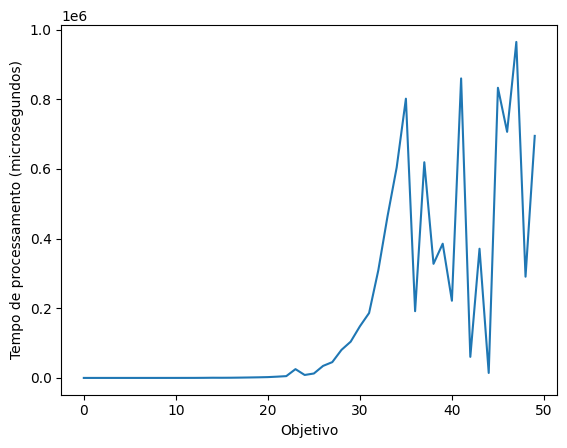

In [5]:
import matplotlib.pyplot as plt
plt.plot(valores_busca_largura)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')


In [6]:
with open('results.txt', 'w') as f:
    f.write(str(valores_busca_largura))
        

In [51]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidade()

    start_time = datetime.now()
    result = algorithm.search(state, m=100)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t

valores_busca_profundidade = np.array([])

for i in range(1, 51):
    valores_busca_profundidade = np.append(valores_busca_profundidade, calcula_iteracao_busca_em_profundidade(i).microseconds )

Text(0.5, 0, 'Objetivo')

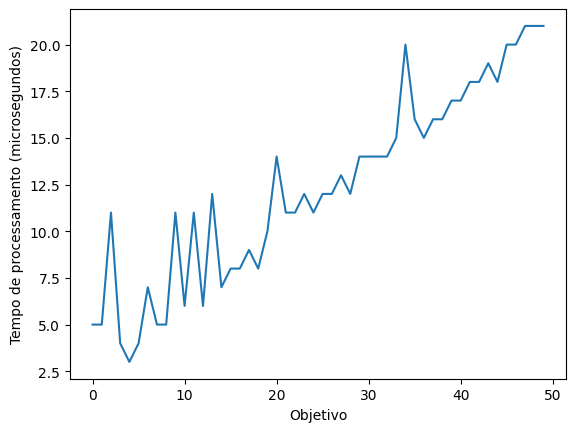

In [53]:
plt.plot(valores_busca_profundidade)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

In [55]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade_iterativa(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidadeIterativa()

    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t

valores_busca_profundidade_iterativa = np.array([])

for i in range(1, 51):
    valores_busca_profundidade_iterativa = np.append(valores_busca_profundidade_iterativa, calcula_iteracao_busca_em_profundidade_iterativa(i).microseconds )

Text(0.5, 0, 'Objetivo')

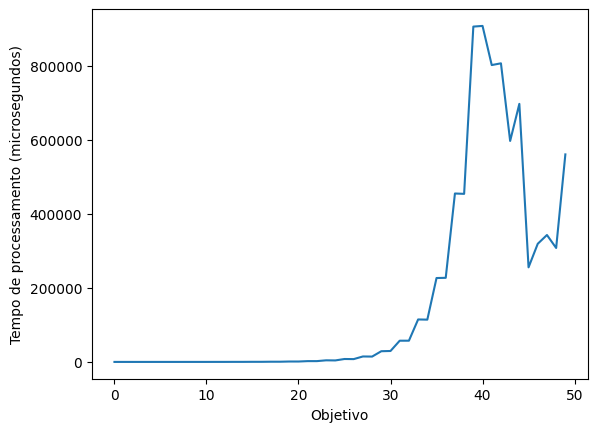

In [56]:
plt.plot(valores_busca_profundidade_iterativa)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

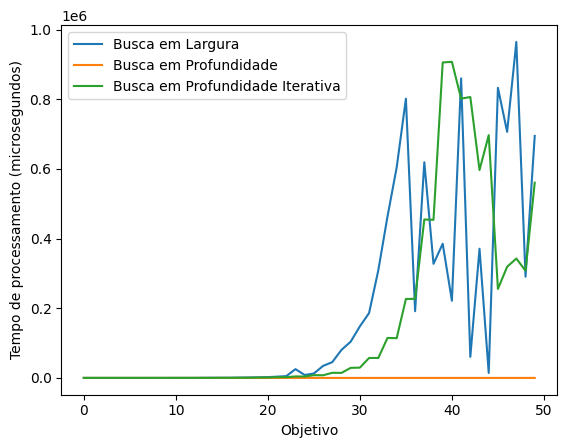

In [59]:
plt.plot(valores_busca_largura, label='Busca em Largura')
plt.plot(valores_busca_profundidade, label='Busca em Profundidade')
plt.plot(valores_busca_profundidade_iterativa, label='Busca em Profundidade Iterativa')
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')
plt.legend()


In [84]:
import pandas as pd

df = pd.DataFrame({'Busca em Largura': valores_busca_largura, 'Busca em Profundidade': valores_busca_profundidade, 'Busca em Profundidade Iterativa': valores_busca_profundidade_iterativa})
df['Objetivo'] = df.index + 1
print(df.to_string(index=False))

 Busca em Largura  Busca em Profundidade  Busca em Profundidade Iterativa  Objetivo
              7.0                    5.0                              7.0         1
              6.0                    5.0                             21.0         2
              9.0                   11.0                              3.0         3
              8.0                    4.0                              7.0         4
             10.0                    3.0                              6.0         5
             12.0                    4.0                             19.0         6
             15.0                    7.0                             13.0         7
             24.0                    5.0                             23.0         8
             31.0                    5.0                             37.0         9
             46.0                   11.0                             43.0        10
             61.0                    6.0                             43.0   